# [실습과제#2] 로지스틱 회귀를 이용한 분류기

In [123]:
import numpy as np 
import matplotlib.pylab as plt 

# Logical AND 연산(이진 분류기)  

In [124]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

In [125]:
x1_min = -0.5 
x1_max = 1.5 

x2_min = -0.5 
x2_max = 1.5 

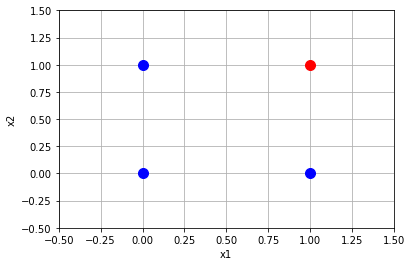

In [126]:
plt.plot(X[:-1, 0], X[:-1, 1], 'b.', markersize=20)
plt.plot(X[-1, 0], X[-1, 1], 'r.', markersize=20)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

Bias 

In [127]:
X_ = np.c_[np.ones(X.shape[0]), X] 
print(X_)

[[1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 1. 1.]]


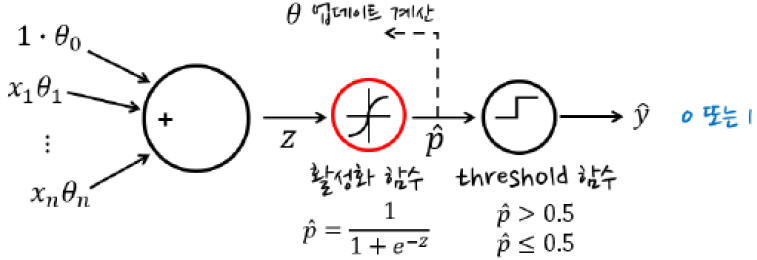

In [128]:
# [6강] 로지스틱회귀_v2.pdf p.12 
def binary_classifier_using_log_reg(X, theta, activation): 
    ################################################## 
    #   Logistic Regression 이용한 이진 분류기 구현  # 
    ################################################## 
    z = X.dot(theta)
    
    p_hat = activation(z)

    return (p_hat>0.5).astype(int)
    ################################################## 
    #                 코드 작성 끝                   # 
    ################################################## 


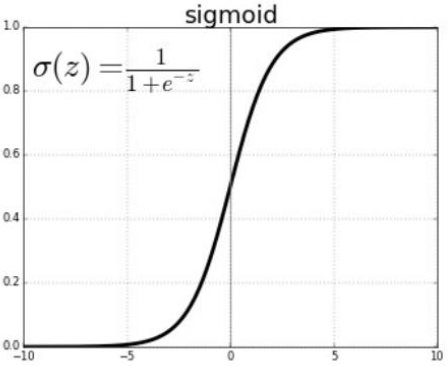

In [129]:
# [6강] 로지스틱회귀_v2.pdf p.11 
def sigmoid(z): 
    ################################################## 
    #          (Logistic) Sigmoid 함수 구현          # 
    ################################################## 
    return 1 / (1 + np.exp(-z))
    ################################################## 
    #                 코드 작성 끝                   # 
    ################################################## 

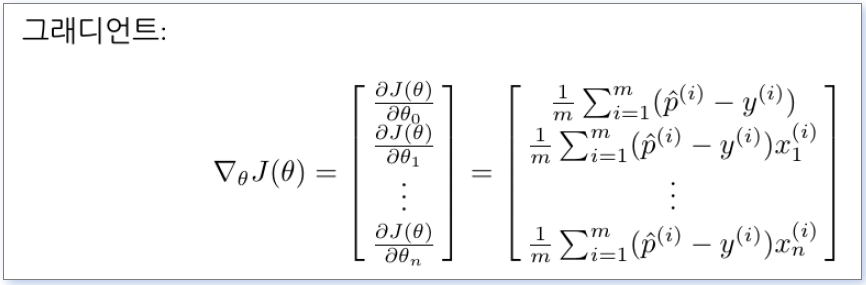

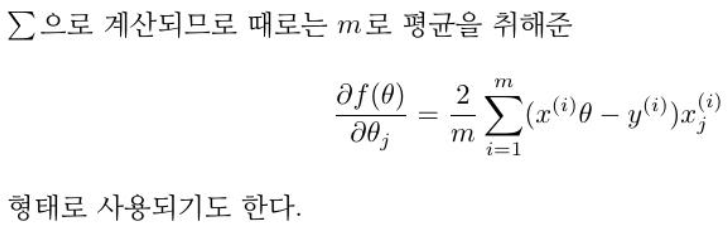

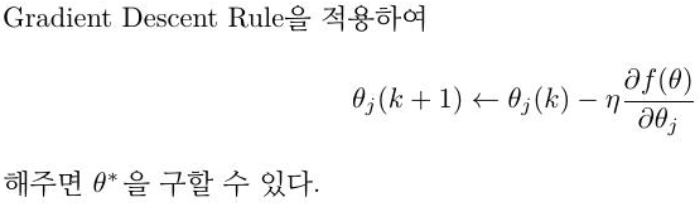

**분류기 학습** 

---
1.   아래의 셀에서 theta의 shape이 (3,)인 이유를 작성하시오. 
---

In [130]:
# [4강] 선형회귀.pdf p.31 
# [6강] 로지스틱회귀_v2.pdf p.17 
eta = 0.1 
n_iterations = 1000 
m = X.shape[0]

theta = np.zeros(3)

for iteration in range(n_iterations): 
    ################################################## 
    #       gradients를 구하고 theta 업데이트        # 
    ################################################## 
    gradients = X_.T.dot(sigmoid(X_.dot(theta)) - y)/m
    theta -= eta * gradients
    ################################################## 
    #                 코드 작성 끝                   # 
    ################################################## 

**학습된 분류기의 분류 결과 확인** 

In [131]:
binary_classifier_using_log_reg(X_, theta, sigmoid)

array([0, 0, 0, 1])

[결과 비교용] 

array([0, 0, 0, 1]) 

**결정 경계 그리기** 

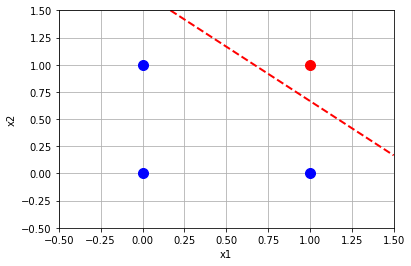

In [132]:
num_of_samples = 10
x1 = np.linspace(x1_min, x1_max, num_of_samples) 
x2 = np.linspace(x2_min, x2_max, num_of_samples) 

x1_ = np.concatenate((x1, x1))
x2_min_and_max = np.concatenate((np.full(num_of_samples, x2_min, dtype=float), np.full(num_of_samples, x2_max, dtype=float)))
X1 = np.c_[x1_, x2_min_and_max]
x2_ = np.concatenate((x2, x2))
x1_min_and_max = np.concatenate((np.full(num_of_samples, x1_min, dtype=float), np.full(num_of_samples, x1_max, dtype=float)))
X2 = np.c_[x1_min_and_max, x2_] 

# https://stackoverflow.com/questions/38073791/flatten-numpy-array-without-double-for-loop/38073913#38073913 
X_new = np.column_stack((X1.ravel(),X2.ravel())) 
# https://stackoverflow.com/questions/38073791/flatten-numpy-array-without-double-for-loop/38073913#38073913 
X_new = np.c_[np.ones(num_of_samples * 4), np.column_stack((X1.ravel(), X2.ravel()))]  

y_hat = binary_classifier_using_log_reg(X_new, theta, sigmoid) 

plt.plot(X[:-1, 0], X[:-1, 1], 'b.', markersize=20) 
plt.plot(X[-1, 0], X[-1, 1], 'r.', markersize=20) 
plt.plot(X_new[y_hat == 1][0][1:], X_new[y_hat == 1][1][1:], "r--", linewidth=2)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

[결과 비교용] 

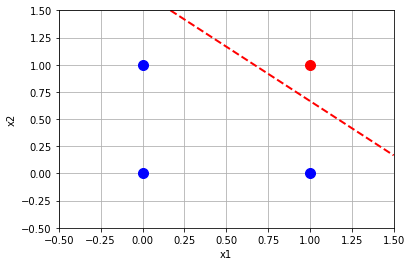

---
Extra Credit: 아래의 그림처럼 결정 영역을 그리시오. 
---

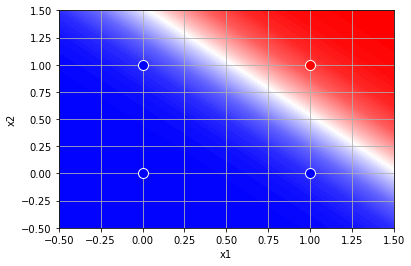



---



활성화 함수를 시그모이드 함수와 다른 함수로 바꾸어서 
분류기 구현 과정 적용 

*   분류기 학습 
*   학습된 분류기의 분류 결과 확인 
*   결정 경계 그리기 

**Actiation function: Tanh**

In [133]:
def Tanh(z): 
    ################################################## 
    #              Tanh 함수 구현              # 
    ################################################## 
    return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
    ################################################## 
    #                 코드 작성 끝                   # 
    ################################################## 

**gradient** **update**

In [134]:
eta = 0.1 
n_iterations = 1000 
m = X.shape[0]

theta = np.zeros(3)

for iteration in range(n_iterations): 
    ################################################## 
    #       gradients를 구하고 theta 업데이트        # 
    ################################################## 
    gradients = X_.T.dot(Tanh(X_.dot(theta)) - y)/m
    theta -= eta * gradients
    ################################################## 
    #                 코드 작성 끝                   # 
    ################################################## 

**학습된 분류기의 분류 결과 확인**

In [135]:
binary_classifier_using_log_reg(X_, theta, Tanh)

array([0, 0, 0, 1])

**결정 경계 그리기**

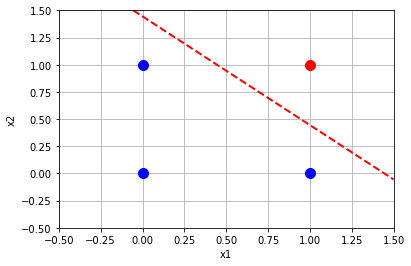

In [136]:
num_of_samples = 10
x1 = np.linspace(x1_min, x1_max, num_of_samples) 
x2 = np.linspace(x2_min, x2_max, num_of_samples) 

x1_ = np.concatenate((x1, x1))
x2_min_and_max = np.concatenate((np.full(num_of_samples, x2_min, dtype=float), np.full(num_of_samples, x2_max, dtype=float)))
X1 = np.c_[x1_, x2_min_and_max]
x2_ = np.concatenate((x2, x2))
x1_min_and_max = np.concatenate((np.full(num_of_samples, x1_min, dtype=float), np.full(num_of_samples, x1_max, dtype=float)))
X2 = np.c_[x1_min_and_max, x2_] 

# https://stackoverflow.com/questions/38073791/flatten-numpy-array-without-double-for-loop/38073913#38073913 
X_new = np.column_stack((X1.ravel(),X2.ravel())) 
# https://stackoverflow.com/questions/38073791/flatten-numpy-array-without-double-for-loop/38073913#38073913 
X_new = np.c_[np.ones(num_of_samples * 4), np.column_stack((X1.ravel(), X2.ravel()))]  

y_hat = binary_classifier_using_log_reg(X_new, theta, Tanh) 

plt.plot(X[:-1, 0], X[:-1, 1], 'b.', markersize=20) 
plt.plot(X[-1, 0], X[-1, 1], 'r.', markersize=20) 
plt.plot(X_new[y_hat == 1][0][1:], X_new[y_hat == 1][1][1:], "r--", linewidth=2)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# Logical OR 연산(이진 분류기)  

In [137]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1])

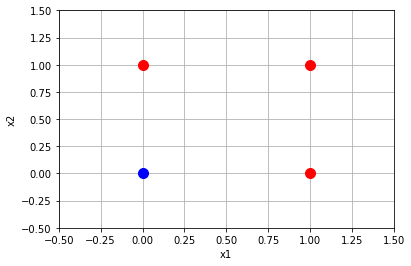

In [138]:
plt.plot(X[0, 0], X[0, 1], 'b.', markersize=20)
plt.plot(X[1:, 0], X[1:, 1], 'r.', markersize=20)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

Bias 

In [139]:
X_ = np.c_[np.ones(X.shape[0]), X] 
print(X_)

[[1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 1. 1.]]


Logical AND 연산(이진 분류기)의 분류기 구현 과정 적용 

*   분류기 학습 
*   학습된 분류기의 분류 결과 확인 
*   결정 경계 그리기 
*   활성화 함수 바꾸어서 분류기 구현 과정 적용  

**분류기** **학습**

In [140]:
def sigmoid(z): 
    ################################################## 
    #          (Logistic) Sigmoid 함수 구현          # 
    ################################################## 
    return 1 / (1 + np.exp(-z))
    ################################################## 
    #                 코드 작성 끝                   # 
    ################################################## 

eta = 0.1 
n_iterations = 1000 
m = X.shape[0]

theta = np.zeros(3)

for iteration in range(n_iterations): 
    ################################################## 
    #       gradients를 구하고 theta 업데이트        # 
    ################################################## 
    gradients = X_.T.dot(sigmoid(X_.dot(theta)) - y)/m
    theta -= eta * gradients
    ################################################## 
    #                 코드 작성 끝                   # 
    ################################################## 

**학습된 분류기의 분류 결과 확인**

In [141]:
binary_classifier_using_log_reg(X_, theta, sigmoid)

array([0, 1, 1, 1])

**결정 경계 그리기**

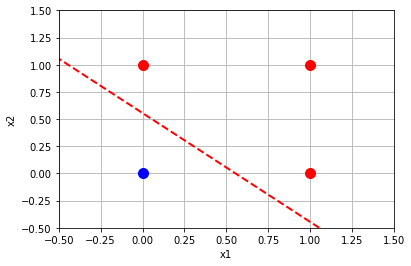

In [142]:
num_of_samples = 10
x1 = np.linspace(x1_min, x1_max, num_of_samples) 
x2 = np.linspace(x2_min, x2_max, num_of_samples) 

x1_ = np.concatenate((x1, x1))
x2_min_and_max = np.concatenate((np.full(num_of_samples, x2_min, dtype=float), np.full(num_of_samples, x2_max, dtype=float)))
X1 = np.c_[x1_, x2_min_and_max]
x2_ = np.concatenate((x2, x2))
x1_min_and_max = np.concatenate((np.full(num_of_samples, x1_min, dtype=float), np.full(num_of_samples, x1_max, dtype=float)))
X2 = np.c_[x1_min_and_max, x2_] 

# https://stackoverflow.com/questions/38073791/flatten-numpy-array-without-double-for-loop/38073913#38073913 
X_new = np.column_stack((X1.ravel(),X2.ravel())) 
# https://stackoverflow.com/questions/38073791/flatten-numpy-array-without-double-for-loop/38073913#38073913 
X_new = np.c_[np.ones(num_of_samples * 4), np.column_stack((X1.ravel(), X2.ravel()))]  

y_hat = binary_classifier_using_log_reg(X_new, theta, sigmoid) 

plt.plot(X[0, 0], X[0, 1], 'b.', markersize=20) 
plt.plot(X[1:, 0], X[1:, 1], 'r.', markersize=20) 
plt.plot(X_new[y_hat == 1][0][1:], X_new[y_hat == 1][1][1:], "r--", linewidth=2)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

**활성화 함수 바꾸어서 분류기 구현 과정 적용**

In [143]:
def Tanh(z): 
    ################################################## 
    #              Tanh 함수 구현              # 
    ################################################## 
    return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
    ################################################## 
    #                 코드 작성 끝                   # 
    ################################################## 

eta = 0.1 
n_iterations = 1000 
m = X.shape[0]

theta = np.zeros(3)

for iteration in range(n_iterations): 
    ################################################## 
    #       gradients를 구하고 theta 업데이트        # 
    ################################################## 
    gradients = X_.T.dot(Tanh(X_.dot(theta)) - y)/m
    theta -= eta * gradients
    ################################################## 
    #                 코드 작성 끝                   # 
    ################################################## 

binary_classifier_using_log_reg(X_, theta, Tanh)

array([0, 1, 1, 1])

# Logical XOR 연산(이진 분류기)  

In [144]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

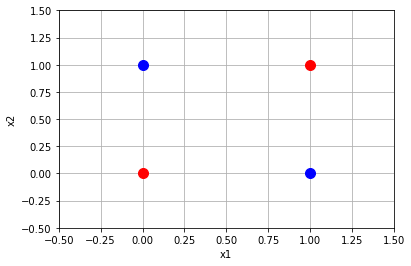

In [145]:
plt.plot(X[0::3, 0], X[0::3, 1], 'r.', markersize=20)
plt.plot(X[1:3, 0], X[1:3, 1], 'b.', markersize=20)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

Bias 

In [146]:
X_ = np.c_[np.ones(X.shape[0]), X] 
print(X_)

[[1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 1. 1.]]


Logical AND 연산(이진 분류기)의 분류기 구현 과정 적용 

*   분류기 학습 
*   학습된 분류기의 분류 결과 확인 
*   결정 경계 그리기 
*   활성화 함수 바꾸어서 분류기 구현 과정 적용  

**분류기** **학습**

In [147]:
def sigmoid(z): 
    ################################################## 
    #          (Logistic) Sigmoid 함수 구현          # 
    ################################################## 
    return 1 / (1 + np.exp(-z))
    ################################################## 
    #                 코드 작성 끝                   # 
    ################################################## 

eta = 0.1 
n_iterations = 1000 
m = X.shape[0]

theta = np.zeros(3)

for iteration in range(n_iterations): 
    ################################################## 
    #       gradients를 구하고 theta 업데이트        # 
    ################################################## 
    gradients = X_.T.dot(sigmoid(X_.dot(theta)) - y)/m
    theta -= eta * gradients
    ################################################## 
    #                 코드 작성 끝                   # 
    ################################################## 

**학습된 분류기의 분류 결과 확인**

In [148]:
binary_classifier_using_log_reg(X_, theta, sigmoid)

array([0, 0, 0, 0])

**결정 경계 그리기**

IndexError: ignored

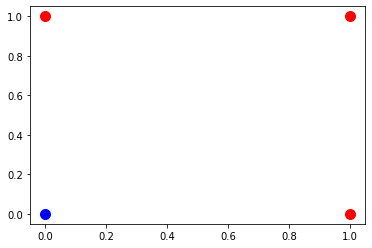

In [149]:
num_of_samples = 10
x1 = np.linspace(x1_min, x1_max, num_of_samples) 
x2 = np.linspace(x2_min, x2_max, num_of_samples) 

x1_ = np.concatenate((x1, x1))
x2_min_and_max = np.concatenate((np.full(num_of_samples, x2_min, dtype=float), np.full(num_of_samples, x2_max, dtype=float)))
X1 = np.c_[x1_, x2_min_and_max]
x2_ = np.concatenate((x2, x2))
x1_min_and_max = np.concatenate((np.full(num_of_samples, x1_min, dtype=float), np.full(num_of_samples, x1_max, dtype=float)))
X2 = np.c_[x1_min_and_max, x2_] 

# https://stackoverflow.com/questions/38073791/flatten-numpy-array-without-double-for-loop/38073913#38073913 
X_new = np.column_stack((X1.ravel(),X2.ravel())) 
# https://stackoverflow.com/questions/38073791/flatten-numpy-array-without-double-for-loop/38073913#38073913 
X_new = np.c_[np.ones(num_of_samples * 4), np.column_stack((X1.ravel(), X2.ravel()))]  

y_hat = binary_classifier_using_log_reg(X_new, theta, sigmoid) 

plt.plot(X[0, 0], X[0, 1], 'b.', markersize=20) 
plt.plot(X[1:, 0], X[1:, 1], 'r.', markersize=20) 
plt.plot(X_new[y_hat == 1][0][1:], X_new[y_hat == 1][1][1:], "r--", linewidth=2)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

**활성화 함수 바꾸어서 분류기 구현 과정 적용**

In [151]:
def Tanh(z): 
    ################################################## 
    #              Tanh 함수 구현              # 
    ################################################## 
    return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
    ################################################## 
    #                 코드 작성 끝                   # 
    ################################################## 

eta = 0.1 
n_iterations = 1000 
m = X.shape[0]

theta = np.zeros(3)

for iteration in range(n_iterations): 
    ################################################## 
    #       gradients를 구하고 theta 업데이트        # 
    ################################################## 
    gradients = X_.T.dot(Tanh(X_.dot(theta)) - y)/m
    theta -= eta * gradients
    ################################################## 
    #                 코드 작성 끝                   # 
    ################################################## 

binary_classifier_using_log_reg(X_, theta, Tanh)

array([0, 0, 0, 1])

# 붓꽃 데이터셋 3개 품종 분류(다중 분류기)  

핸즈 온 머신러닝 p.202 

붓꽃 데이터셋 

*   3개의 품종(Iris-Setosa[0], Iris-Versicolor[1], Iris-Virginica[2]) 

*   150개 samples

*   꽃받침의 길이[0], 꽃받침의 너비[1], 꽃잎의 길이[2], 꽃잎의 너비[3] (4개 features) 

꽃잎의 길이와 꽃잎의 너비를 기반으로 분류

In [152]:
from sklearn import datasets 
iris = datasets.load_iris() 
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [153]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [154]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [155]:
X = iris['data'][:, (2, 3)] # 꽃잎 길이, 꽃잎 너비 
y = iris['target']

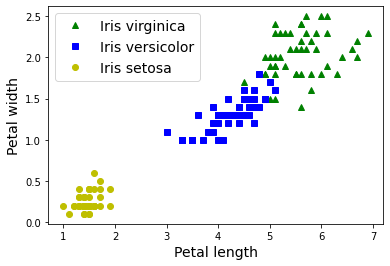

In [156]:
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show() 

Bias 

In [157]:
X_ = np.c_[np.ones(X.shape[0]), X] 
print(X_.shape)

(150, 3)


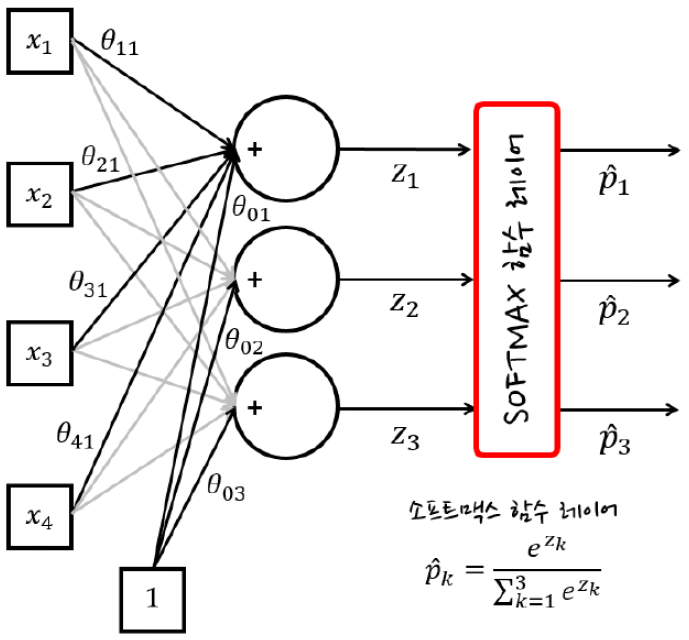

In [158]:
# [7강] 로지스틱회귀 심화_v2.pdf p.12 
def multiclass_classifier_using_softmax(X, theta, activation): 
    ################################################## 
    #   Logistic Regression 이용한 다중 분류기 구현  # 
    ################################################## 
    Z = X.dot(theta)
    
    p_hat = activation(Z, axis=1)

    return np.argmax(p_hat, axis=1)
    ################################################## 
    #                 코드 작성 끝                   # 
    ################################################## 

---
2.   get_one_hot() 함수의 결과와 사용하는 이유를 작성하시오. 
---

In [159]:
# https://stackoverflow.com/questions/65643248/one-hot-encoding-from-numpy
def get_one_hot(targets, nb_classes):
    res = np.eye(nb_classes)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape)+[nb_classes])

In [160]:
y_ = get_one_hot(y, 3)
print(y_.shape)

(150, 3)


**분류기 학습** 

In [161]:
from scipy.special import softmax

---
3.   아래의 셀에서 theta의 shape이 (3, 3)인 이유를 작성하시오. 
---

In [162]:
eta = 0.1 
n_iterations = 1000
m = X.shape[0]

theta = np.random.randn(3, 3)

for iteration in range(n_iterations): 
    ################################################## 
    #       gradients를 구하고 theta 업데이트        # 
    ################################################## 

    gradients = X_.T.dot(softmax(X_.dot(theta), axis=1) - y_)/m
    theta -= eta*gradients
    ################################################## 
    #                 코드 작성 끝                   # 
    ################################################## 


In [163]:
theta

array([[ 4.54210511,  0.11689809, -3.64656908],
       [-0.66302909,  0.41545722,  0.11204503],
       [-3.03443722, -0.72860801,  2.54659167]])

**결정 영역 그리기** 

In [164]:
y_hat = multiclass_classifier_using_softmax(X_, theta, softmax)

In [165]:
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

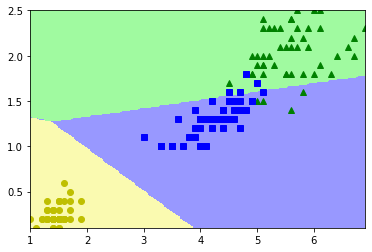

In [166]:
x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0]) 
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0])

X1, X2 = np.meshgrid(x1, x2) 

# https://stackoverflow.com/questions/38073791/flatten-numpy-array-without-double-for-loop/38073913#38073913 
X_new = np.column_stack((X1.ravel(),X2.ravel()))
# https://stackoverflow.com/questions/38073791/flatten-numpy-array-without-double-for-loop/38073913#38073913 
X_new = np.c_[np.ones(X.shape[0] ** 2), np.column_stack((X1.ravel(),X2.ravel()))] 

y_hat = multiclass_classifier_using_softmax(X_new, theta, softmax) 

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0']) 

plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")
plt.contourf(X1, X2, y_hat.reshape(X1.shape), cmap=custom_cmap, vmin=y_hat.min(), vmax=y_hat.max(), levels=200) 
plt.show() 

[결과 참고용] 

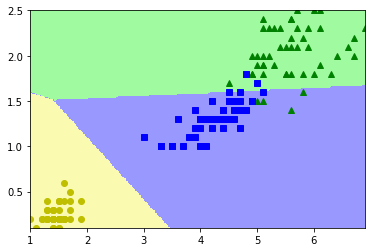